# Linear Regression with Python

 A real estate agent wants to predict housing prices in different regions of the USA. Let's create a model that takes in a few features of a house, such as its size, number of bedrooms, and location, and then gives an estimate of how much the house would sell for.

Linear Regression might be a good path to solve this problem!

You have some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.

'Avg. Area House Age': Avg Age of Houses in same city

'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city

'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city

'Area Population': Population of city house is located in

'Price': Price that the house sold at

'Address': Address for the house

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,r2_score


# Check out the Data


In [2]:
USAhousing=pd.read_csv('USA_Housing.csv')


In [3]:
USAhousing.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
#checking number of rows and columns in the data frame
USAhousing.shape

(5000, 7)

In [5]:
#checking missing values
USAhousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Understanding the correlation between various features in the datasets

1.Positive Correlation

2.Negative Correlation

In [9]:
correlation=USAhousing.corr()
correlation

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

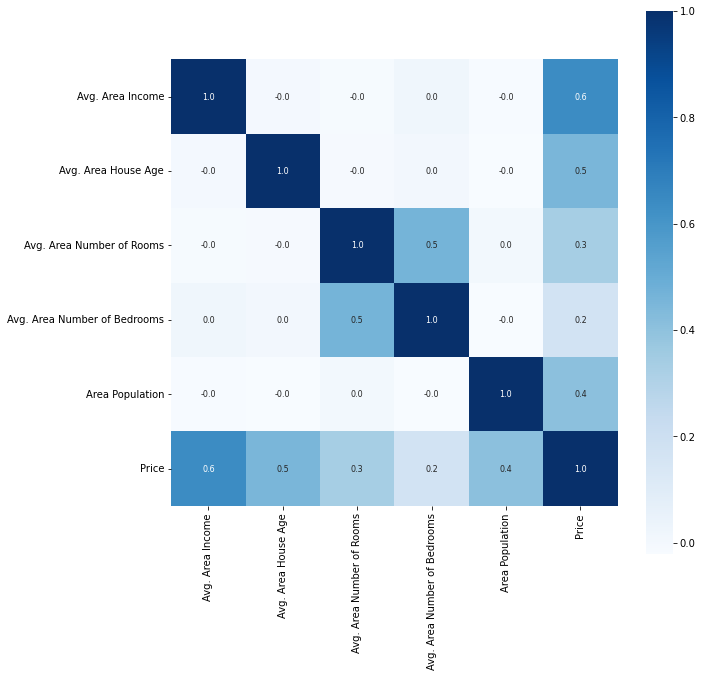

In [10]:
#Constructing a heatmap to understand the correlation 
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

# Splitting the Data and Target

In [11]:
X=USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
Y=USAhousing['Price']

In [12]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [13]:
Y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

# Splitting the Data into Training and Test data

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [15]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4227,66547.016454,5.846095,6.847298,4.13,27850.822901
4676,53722.008599,6.401391,7.787764,3.30,47649.224665
800,64838.492899,6.437157,8.699544,4.02,32921.010068
3671,67097.092120,6.086754,7.211963,3.05,27191.506877
4193,75245.465436,8.167820,7.420100,3.42,37410.669928
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


In [16]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
4711,77267.656264,3.939501,8.342808,6.09,22487.712072
2313,75967.135085,5.939370,6.111658,2.32,38897.091584
3214,81013.615294,7.149797,7.239105,5.44,45472.049451
2732,86762.882864,6.530193,5.106962,2.09,47724.581355


In [17]:
print(X.shape,X_train.shape,X_test.shape)

(5000, 5) (4000, 5) (1000, 5)


In [18]:
print(Y.shape,y_train.shape,y_test.shape)

(5000,) (4000,) (1000,)


# Model Training-Linear Regression

In [19]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Prediction from our model

In [20]:
y_pred=model.predict(X_test)


In [21]:
y_pred

array([1308587.92699714, 1237037.22949391, 1243429.34030722,
       1228900.21360437, 1063320.90710747, 1544058.05034817,
       1094774.70493034,  833284.72339249,  788412.85578756,
       1469714.86615696,  671728.43662092, 1606818.21977767,
       1004166.61331045, 1796798.97595973, 1288566.96220949,
       1087782.93301086, 1423072.3749249 , 1078178.68169646,
        802286.03537917,  930761.03695739, 1134829.86477803,
        916398.42023083, 1489972.69335353, 1284580.15538841,
       1582071.35322685, 1132519.15992002, 1089888.39644489,
        974510.51872177,  924057.96820804, 1740759.72092213,
       1286481.59512379, 1621289.95171618, 1435264.20161695,
       1234014.77924529, 1485434.5730037 , 1718335.00753592,
       1538953.74882758,  777106.64791831, 1765201.52243597,
       1175972.14199831, 1553707.94323478,  897703.67505165,
       1371049.803266  ,  845281.72310351, 1201022.89803856,
       1133285.98450789, 1363128.14557396, 1449814.0876822 ,
       1574363.90467323,

# Visualizing the actual and predicted price

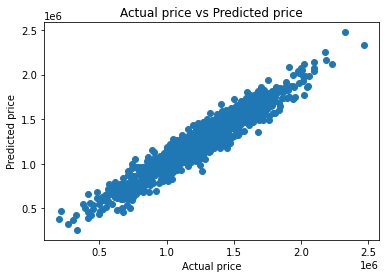

In [22]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

# Model Evaluation -Linear Regression

In [24]:

print("Mean_absolute_percentage_error:",mean_absolute_percentage_error(y_test, y_pred))
print("R2 score:",r2_score(y_test, y_pred))

Mean_absolute_percentage_error: 0.07387838859753282
R2 score: 0.9179971706834602


# Model Training-Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
model_2 = RandomForestRegressor(n_estimators=400, random_state=42)


In [28]:
model_2.fit(X_train,y_train)

RandomForestRegressor(n_estimators=400, random_state=42)

# Prediction from our model

In [29]:
y_pred2=model_2.predict(X_test)

# Model Evaluation-Random Forest

In [30]:


print("Mean_absolute_percentage_error:",mean_absolute_percentage_error(y_test, y_pred2))
print("R2 score:",r2_score(y_test, y_pred2))

Mean_absolute_percentage_error: 0.08833312663214292
R2 score: 0.8832269304351268


# Model Training-XGBoost Regressor

In [31]:
from xgboost import XGBRegressor


In [32]:
model_3=XGBRegressor()

In [33]:
model_3.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred3=model_3.predict(X_test)

# Model Evaluation-XGBoost Regressor

In [35]:
print("Mean_absolute_percentage_error:",mean_absolute_percentage_error(y_test, y_pred3))
print("R2 score:",r2_score(y_test, y_pred3))

Mean_absolute_percentage_error: 0.08911786263882289
R2 score: 0.8787901076275872


In [37]:

model_names = ['model_1', 'model_2', 'model_3']
r2_scores = [0.91, 0.88, 0.87]
mae_values = [0.073, 0.0883, 0.089]


data = {
    'Model': model_names,
    'R² Score': r2_scores,
    'MAE': mae_values
}

df = pd.DataFrame(data)

df
df_sorted = df.sort_values(by='R² Score', ascending=False)
df_sorted



,Model,R² Score,MAE
0,model_1,0.91,0.0730
1,model_2,0.88,0.0883
2,model_3,0.87,0.0890


# Conclusion

Based on the comparison of R² scores and MAE values, Model 1 is the best-performing model with an R² score of 0.901and an MAE of 0.073. This model explains the highest proportion of variance in the dependent variable while also having the smallest average error. Therefore, Model 1 is recommended for deployment. 